In [1]:
!pip install idx2numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for idx2numpy: filename=idx2numpy-1.2.3-py3-none-any.whl size=7917 sha256=9e89bc650187cb102c2d0566e2bf4776db7c85aa468516298ac8fbf66d1889d7
  Stored in directory: /root/.cache/pip/wheels/1a/ce/ad/d5e95a35cfe34149aade5e500f2edd535c0566d79e9a8e1d8a
Successfully built idx2numpy


In [2]:
#importing all the necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.cluster import AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
import idx2numpy

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#It is a python package which provides tools to convert files to and from IDX format into numpy.ndarray.

x_train = idx2numpy.convert_from_file('/content/drive/MyDrive/A2_Q5/train-images-idx3-ubyte')
y_train = idx2numpy.convert_from_file('/content/drive/MyDrive/A2_Q5/train-labels-idx1-ubyte')
x_test = idx2numpy.convert_from_file('/content/drive/MyDrive/A2_Q5/t10k-images-idx3-ubyte')
y_test = idx2numpy.convert_from_file('/content/drive/MyDrive/A2_Q5/t10k-labels-idx1-ubyte')

In [5]:
print("Training Dataset Size: ")
print(x_train.shape)
print(y_train.shape)
print("\nTest Dataset Size: ")
print(x_test.shape)
print(y_test.shape)

Training Dataset Size: 
(60000, 28, 28)
(60000,)

Test Dataset Size: 
(10000, 28, 28)
(10000,)


In [6]:
# reshaping the numpy array to 2 dimesional array using .reshape function.
x_train = x_train.reshape((-1,784))
x_test = x_test.reshape((-1,784))

In [7]:
print("Training Dataset Size: ")
print(x_train.shape)
print(y_train.shape)
print("\nTest Dataset Size: ")
print(x_test.shape)
print(y_test.shape)

Training Dataset Size: 
(60000, 784)
(60000,)

Test Dataset Size: 
(10000, 784)
(10000,)


In [8]:
# creating subsample of 20k data from the whole dataset because collab is not able to accomodate memory for the entire dataset altogether.
x_train = pd.DataFrame(x_train[:16000])
x_test = pd.DataFrame(x_test[:4000])
y_train = pd.DataFrame(y_train[:16000])     #16000,4000 = 20k
y_test = pd.DataFrame(y_test[:4000])

In [9]:
#the data is already splitted into train and test.
#We will extrat validation datset bt again aplitting x_train into X_train and x_val so that the whole ratio of train:val:test = 70:10:20.

from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.125)      #1/8 of data

In [96]:
print("Training Dataset Size: ")
print(x_train.shape)
print(y_train.shape)
print("\nTest Dataset Size: ")
print(x_test.shape)
print(y_test.shape)
print("\nValidation Dataset Size: ")
print(x_val.shape)
print(y_val.shape)

Training Dataset Size: 
(14000, 784)
(14000, 1)

Test Dataset Size: 
(4000, 784)
(4000, 1)

Validation Dataset Size: 
(2000, 784)
(2000, 1)


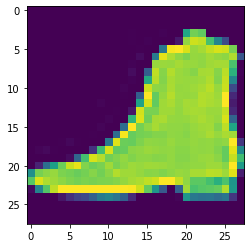

In [123]:
plt.imshow(x_train.iloc[28,:].values.reshape((28,28)))
plt.show()

#Dendrogram

######A **dendrogram** is a diagram that shows the hierarchical relationship between objects. It is most commonly created as an output from hierarchical clustering. The main use of a dendrogram is to work out the best way to allocate objects to clusters.
###### The key to interpreting a dendrogram is to focus on the height at which any two objects are joined together. The height of the dendrogram indicates the order in which the clusters were joined. A more informative dendrogram can be created where the heights reflect the distance between the clusters 

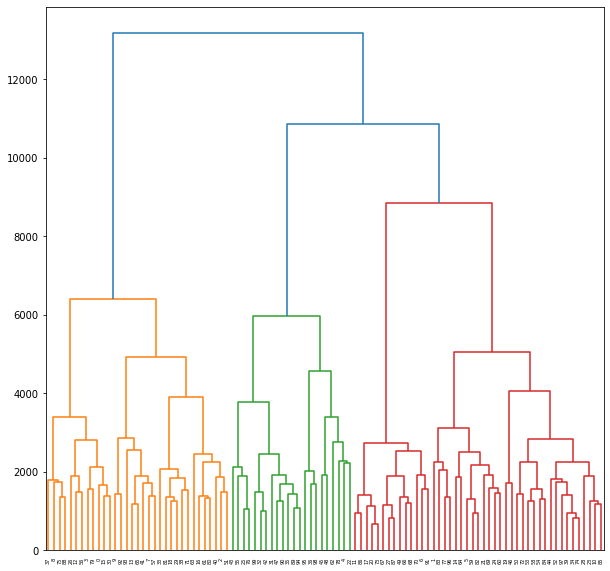

In [112]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize = (10,10))
x_sample=pd.DataFrame(x_train).sample(n=100)
dendogram = sch.dendrogram (sch.linkage (x_sample, method='ward'))

#####Normalization is a scaling technique in which values are shifted and rescaled so that they end up ranging between 0 and 1. It is also known as Min-Max scaling. Normalization gives equal weights/importance to each variable so that no single variable steers model performance in one direction just because they are bigger numbers.

In [12]:
#Normalising all the data
norm_x_train = preprocessing.normalize(x_train)
x_train_new = pd.DataFrame(norm_x_train, columns=x_train.columns)

norm_x_test = preprocessing.normalize(x_test)
x_test_new = pd.DataFrame(norm_x_test, columns=x_test.columns)

norm_x_val = preprocessing.normalize(x_val)
x_val_new = pd.DataFrame(norm_x_val, columns=x_val.columns)

#Heirechical Based CLustering

Hierarchical clustering is an unsupervised machine learning algorithm, which is used to group the unlabeled datasets into a cluster and also known as hierarchical cluster analysis or HCA. In this algorithm, we develop the hierarchy of clusters in the form of a tree, and this tree-shaped structure is known as the dendrogram.

**AgglomerativeClustering**: The agglomerative hierarchical clustering algorithm is a popular example of HCA. To group the datasets into clusters, it follows the bottom-up approach. It means, this algorithm considers each dataset as a single cluster at the beginning, and then start combining the closest pair of clusters together. It does this until all the clusters are merged into a single cluster that contains all the datasets.

This hierarchy of clusters is represented in the form of the dendrogram.

In [13]:
#Creatind an object of AgglomerativeClustering and fitting our normalized training data.

hc = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
hc.fit(norm_x_train)

AgglomerativeClustering()

In [14]:
labels = hc.labels_
print("Labels: ", labels)

Labels:  [0 1 1 ... 1 0 0]


In [15]:
test_pred = hc.fit_predict(norm_x_test)
train_pred = hc.fit_predict(norm_x_train)
val_pred = hc.fit_predict(norm_x_val)

Silhouette Coefficient or silhouette score is a metric used to calculate the goodness of a clustering technique. Its value ranges from -1 to 1.

1: Means clusters are well apart from each other and clearly distinguished.

0: Means clusters are indifferent, or we can say that the distance between clusters is not significant.

-1: Means clusters are assigned in the wrong way.

In [16]:
test_score = silhouette_score(y_test, test_pred)*100
train_score = silhouette_score(y_train, train_pred)*100
val_score = silhouette_score(y_val, val_pred)*100

In [17]:
names = ['Test Score','Train Score','Validation Score']
values = [test_score,train_score,val_score]
merged = list(zip(names, values))
df = pd.DataFrame(merged,columns=['Dataset Partition', 'Average Score'])
df


,Dataset Partition,Average Score
0,Test Score,35.066626
1,Train Score,46.470799
2,Validation Score,35.278303


#Density based Clustering

Fundamentally, all clustering methods use the same approach i.e. first we calculate similarities and then we use it to cluster the data points into groups or batches. Here we will focus on Density-based spatial clustering of applications with noise (DBSCAN) clustering method. 

Clusters are dense regions in the data space, separated by regions of the lower density of points. The DBSCAN algorithm is based on this intuitive notion of “clusters” and “noise”. The key idea is that for each point of a cluster, the neighborhood of a given radius has to contain at least a minimum number of points. 

In [66]:
#Creatind an object of DBSCAN and fitting our normalized training data.
dbscan = DBSCAN(min_samples=5).fit(norm_x_train)

In [110]:
labels_db = dbscan.labels_
print("Labels: ", labels_db)

Labels:  [0 0 0 ... 0 0 0]


In [105]:
test_pred_db = dbscan.fit_predict(norm_x_test)
train_predict_db = dbscan.fit_predict(norm_x_train)
val_pred_db = dbscan.fit_predict(norm_x_val)

In [106]:
test_score = silhouette_score(y_test, test_pred_db)*100
train_score = silhouette_score(y_train, train_predict_db)*100
val_score = silhouette_score(y_val, val_pred_db)*100

In [107]:
names = ['Test Score','Train Score','Validation Score']
values = [test_score,train_score,val_score]
merged = list(zip(names, values))
df = pd.DataFrame(merged,columns=['Dataset Partition', 'Average Score'])
df



,Dataset Partition,Average Score
0,Test Score,-29.997355
1,Train Score,-20.836090
2,Validation Score,-4.620687


Which performed better?
* The DBSCAN algorithm has -ve silhouette score, meaning it doesn't generalize well on the data the model has not seen.
* Agglomerative clustering is better as it is able to generalize data well enough to put it into its appropriate cluster.